In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot



In [2]:
#x=np.concatenate((dataset[:,2:4], data,axis = 1)
#pd.DataFrame(x).to_csv("Data_AutoML.csv", header=False, index=False)
df = pd.read_csv('combined_11_params.csv')
#check data has been read in properly
df.head()



,timeStamp,wattsupPower,currentCPUFrequency,userTime1Sec,percentCPU,interrupts,interruptsSoftware,numberOfProcesses,percentVirtualMemory,systemCalls,sharedMemoryUsedBytes,instructions,missRatio
0,Mon May 18 15:43:15 2020,66.7,1205.514969,0.001765,0.0,140.136533,131.664803,378,1.9,131.664803,304152576,4168798,0.019266
1,Mon May 18 15:43:21 2020,70.2,1201.050531,0.000000,0.1,153.115842,146.116260,379,1.9,146.116260,304152576,4338381,0.014137
2,Mon May 18 15:43:29 2020,67.3,1200.979906,0.001793,0.1,169.126352,162.849128,379,1.9,162.849128,304152576,3851861,0.019095
3,Mon May 18 15:43:35 2020,67.1,1204.967281,0.000000,0.1,167.664863,168.534720,379,1.9,168.534720,304152576,5673982,0.017873
4,Mon May 18 15:43:43 2020,67.6,1237.304063,0.001795,0.1,159.414647,160.312252,379,1.9,160.312252,304152576,4348190,0.015933


In [3]:
#cols = [0,4,5,7,11,12,13,14,15,16,17,18,19,20,21,22]
cols = [0,1,10]
x = df.drop(df.columns[cols], axis=1)
y = df['wattsupPower'].values
x.head()

,currentCPUFrequency,userTime1Sec,percentCPU,interrupts,interruptsSoftware,numberOfProcesses,percentVirtualMemory,systemCalls,instructions,missRatio
0,1205.514969,0.001765,0.0,140.136533,131.664803,378,1.9,131.664803,4168798,0.019266
1,1201.050531,0.000000,0.1,153.115842,146.116260,379,1.9,146.116260,4338381,0.014137
2,1200.979906,0.001793,0.1,169.126352,162.849128,379,1.9,162.849128,3851861,0.019095
3,1204.967281,0.000000,0.1,167.664863,168.534720,379,1.9,168.534720,5673982,0.017873
4,1237.304063,0.001795,0.1,159.414647,160.312252,379,1.9,160.312252,4348190,0.015933


In [4]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
xscale=scaler.transform(x)
yscale=y

In [6]:
x.shape


(4509, 10)

In [7]:
y[:10]

array([66.7, 70.2, 67.3, 67.1, 67.6, 67.4, 66.9, 83.2, 67.7, 67.8])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
#X_train.size / 7
#X_test.size / 7
#y_train[0]

In [9]:
model = Sequential()


############ 75.8418 ############
# model.add(Dense(40, input_dim=8, kernel_initializer='normal', activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(24, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='linear'))

########### 92.8970 ################
# model.add(Dense(64, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='linear'))

########## 30.7504 #####################
# model.add(Dense(64, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='linear'))
    
######### 30.5148 ######################
# model.add(Dense(64, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='linear'))

########### 27.4539 #####################
# model.add(Dense(64, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='linear'))

######### 27.7898 ####################
model.add(Dense(64, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))



model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
__________________

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [11]:
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Train on 2704 samples, validate on 677 samples
Epoch 1/500
2704/2704 [==============================] - 0s 138us/sample - loss: 3588.9315 - mean_squared_error: 3588.9302 - mean_absolute_error: 42.4501 - val_loss: 107.7579 - val_mean_squared_error: 107.7579 - val_mean_absolute_error: 9.2003
Epoch 2/500
2704/2704 [==============================] - 0s 81us/sample - loss: 84.2923 - mean_squared_error: 84.2923 - mean_absolute_error: 7.8009 - val_loss: 74.5465 - val_mean_squared_error: 74.5465 - val_mean_absolute_error: 7.0127
Epoch 3/500
2704/2704 [==============================] - 0s 81us/sample - loss: 76.0698 - mean_squared_error: 76.0699 - mean_absolute_error: 7.2370 - val_loss: 74.3368 - val_mean_squared_error: 74.3368 - val_mean_absolute_error: 6.9910
Epoch 4/500
2704/2704 [==============================] - 0s 80us/sample - loss: 72.4438 - mean_squared_error: 72.4438 - mean_absolute_error: 6.9723 - val_loss: 69.9678 - val_mean_squared_error: 69.9678 - val_mean_absolute_error: 6.5145
E

2704/2704 [==============================] - 0s 79us/sample - loss: 29.5755 - mean_squared_error: 29.5755 - mean_absolute_error: 3.8172 - val_loss: 27.5831 - val_mean_squared_error: 27.5831 - val_mean_absolute_error: 3.2501
Epoch 36/500
2704/2704 [==============================] - 0s 82us/sample - loss: 27.3673 - mean_squared_error: 27.3673 - mean_absolute_error: 3.5413 - val_loss: 28.7358 - val_mean_squared_error: 28.7358 - val_mean_absolute_error: 3.7528
Epoch 37/500
2704/2704 [==============================] - 0s 86us/sample - loss: 27.3268 - mean_squared_error: 27.3268 - mean_absolute_error: 3.5857 - val_loss: 25.5513 - val_mean_squared_error: 25.5513 - val_mean_absolute_error: 3.0330
Epoch 38/500
2704/2704 [==============================] - 0s 79us/sample - loss: 36.0498 - mean_squared_error: 36.0499 - mean_absolute_error: 4.3345 - val_loss: 25.9931 - val_mean_squared_error: 25.9931 - val_mean_absolute_error: 3.2931
Epoch 39/500
2704/2704 [==============================] - 0s 83us

Epoch 70/500
2704/2704 [==============================] - 0s 77us/sample - loss: 27.1694 - mean_squared_error: 27.1694 - mean_absolute_error: 3.5687 - val_loss: 24.3658 - val_mean_squared_error: 24.3658 - val_mean_absolute_error: 3.0848
Epoch 71/500
2704/2704 [==============================] - 0s 76us/sample - loss: 26.1585 - mean_squared_error: 26.1585 - mean_absolute_error: 3.4310 - val_loss: 25.4317 - val_mean_squared_error: 25.4317 - val_mean_absolute_error: 3.4876
Epoch 72/500
2704/2704 [==============================] - 0s 78us/sample - loss: 27.9540 - mean_squared_error: 27.9540 - mean_absolute_error: 3.6608 - val_loss: 26.1327 - val_mean_squared_error: 26.1327 - val_mean_absolute_error: 3.1638
Epoch 73/500
2704/2704 [==============================] - 0s 74us/sample - loss: 26.0841 - mean_squared_error: 26.0841 - mean_absolute_error: 3.4146 - val_loss: 29.9582 - val_mean_squared_error: 29.9582 - val_mean_absolute_error: 3.9585
Epoch 74/500
2704/2704 [============================

2704/2704 [==============================] - 0s 73us/sample - loss: 26.7987 - mean_squared_error: 26.7987 - mean_absolute_error: 3.5009 - val_loss: 22.4704 - val_mean_squared_error: 22.4704 - val_mean_absolute_error: 2.7174
Epoch 105/500
2704/2704 [==============================] - 0s 74us/sample - loss: 24.2207 - mean_squared_error: 24.2207 - mean_absolute_error: 3.2368 - val_loss: 27.9870 - val_mean_squared_error: 27.9870 - val_mean_absolute_error: 3.7825
Epoch 106/500
2704/2704 [==============================] - 0s 72us/sample - loss: 26.7958 - mean_squared_error: 26.7958 - mean_absolute_error: 3.4447 - val_loss: 27.0118 - val_mean_squared_error: 27.0118 - val_mean_absolute_error: 3.4705
Epoch 107/500
2704/2704 [==============================] - 0s 75us/sample - loss: 25.6888 - mean_squared_error: 25.6888 - mean_absolute_error: 3.3814 - val_loss: 23.8229 - val_mean_squared_error: 23.8229 - val_mean_absolute_error: 3.1379
Epoch 108/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 103us/sample - loss: 22.7431 - mean_squared_error: 22.7431 - mean_absolute_error: 3.0857 - val_loss: 28.4290 - val_mean_squared_error: 28.4290 - val_mean_absolute_error: 3.8240
Epoch 139/500
2704/2704 [==============================] - 0s 96us/sample - loss: 21.5718 - mean_squared_error: 21.5718 - mean_absolute_error: 2.9851 - val_loss: 23.0701 - val_mean_squared_error: 23.0701 - val_mean_absolute_error: 2.7901
Epoch 140/500
2704/2704 [==============================] - 0s 75us/sample - loss: 23.1872 - mean_squared_error: 23.1872 - mean_absolute_error: 3.1584 - val_loss: 31.0262 - val_mean_squared_error: 31.0262 - val_mean_absolute_error: 4.3232
Epoch 141/500
2704/2704 [==============================] - 0s 76us/sample - loss: 23.8446 - mean_squared_error: 23.8446 - mean_absolute_error: 3.1862 - val_loss: 22.5389 - val_mean_squared_error: 22.5389 - val_mean_absolute_error: 2.9965
Epoch 142/500
2704/2704 [==============================] - 0s

2704/2704 [==============================] - 0s 82us/sample - loss: 24.2893 - mean_squared_error: 24.2893 - mean_absolute_error: 3.3525 - val_loss: 23.5945 - val_mean_squared_error: 23.5945 - val_mean_absolute_error: 3.1290
Epoch 173/500
2704/2704 [==============================] - 0s 85us/sample - loss: 21.7953 - mean_squared_error: 21.7953 - mean_absolute_error: 3.0320 - val_loss: 29.0854 - val_mean_squared_error: 29.0854 - val_mean_absolute_error: 3.8724
Epoch 174/500
2704/2704 [==============================] - 0s 81us/sample - loss: 21.0002 - mean_squared_error: 21.0002 - mean_absolute_error: 2.9463 - val_loss: 22.0670 - val_mean_squared_error: 22.0670 - val_mean_absolute_error: 2.6099
Epoch 175/500
2704/2704 [==============================] - 0s 77us/sample - loss: 21.9008 - mean_squared_error: 21.9008 - mean_absolute_error: 3.0246 - val_loss: 22.4282 - val_mean_squared_error: 22.4282 - val_mean_absolute_error: 2.5337
Epoch 176/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 82us/sample - loss: 22.2684 - mean_squared_error: 22.2684 - mean_absolute_error: 3.1488 - val_loss: 22.6205 - val_mean_squared_error: 22.6205 - val_mean_absolute_error: 2.7267
Epoch 207/500
2704/2704 [==============================] - 0s 88us/sample - loss: 21.7367 - mean_squared_error: 21.7367 - mean_absolute_error: 3.0460 - val_loss: 25.2166 - val_mean_squared_error: 25.2167 - val_mean_absolute_error: 3.3110
Epoch 208/500
2704/2704 [==============================] - 0s 89us/sample - loss: 21.2534 - mean_squared_error: 21.2534 - mean_absolute_error: 2.9304 - val_loss: 23.9923 - val_mean_squared_error: 23.9923 - val_mean_absolute_error: 3.1967
Epoch 209/500
2704/2704 [==============================] - 0s 87us/sample - loss: 21.0430 - mean_squared_error: 21.0430 - mean_absolute_error: 3.0020 - val_loss: 21.0012 - val_mean_squared_error: 21.0012 - val_mean_absolute_error: 2.6727
Epoch 210/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 80us/sample - loss: 20.3279 - mean_squared_error: 20.3279 - mean_absolute_error: 2.8987 - val_loss: 34.0810 - val_mean_squared_error: 34.0810 - val_mean_absolute_error: 4.3039
Epoch 241/500
2704/2704 [==============================] - 0s 72us/sample - loss: 21.3195 - mean_squared_error: 21.3195 - mean_absolute_error: 3.0553 - val_loss: 25.4680 - val_mean_squared_error: 25.4680 - val_mean_absolute_error: 3.2307
Epoch 242/500
2704/2704 [==============================] - 0s 92us/sample - loss: 20.7272 - mean_squared_error: 20.7272 - mean_absolute_error: 2.9846 - val_loss: 21.0926 - val_mean_squared_error: 21.0926 - val_mean_absolute_error: 2.5090
Epoch 243/500
2704/2704 [==============================] - 0s 92us/sample - loss: 20.6020 - mean_squared_error: 20.6019 - mean_absolute_error: 2.9500 - val_loss: 22.0693 - val_mean_squared_error: 22.0693 - val_mean_absolute_error: 2.6533
Epoch 244/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 79us/sample - loss: 21.8495 - mean_squared_error: 21.8495 - mean_absolute_error: 3.1308 - val_loss: 21.9883 - val_mean_squared_error: 21.9883 - val_mean_absolute_error: 2.7526
Epoch 275/500
2704/2704 [==============================] - 0s 75us/sample - loss: 19.5376 - mean_squared_error: 19.5376 - mean_absolute_error: 2.8494 - val_loss: 21.8153 - val_mean_squared_error: 21.8153 - val_mean_absolute_error: 2.7913
Epoch 276/500
2704/2704 [==============================] - 0s 78us/sample - loss: 21.1728 - mean_squared_error: 21.1728 - mean_absolute_error: 3.0548 - val_loss: 27.3698 - val_mean_squared_error: 27.3698 - val_mean_absolute_error: 3.5688
Epoch 277/500
2704/2704 [==============================] - 0s 79us/sample - loss: 19.9113 - mean_squared_error: 19.9113 - mean_absolute_error: 2.8518 - val_loss: 23.7315 - val_mean_squared_error: 23.7315 - val_mean_absolute_error: 3.0772
Epoch 278/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 75us/sample - loss: 18.6755 - mean_squared_error: 18.6755 - mean_absolute_error: 2.7467 - val_loss: 21.2957 - val_mean_squared_error: 21.2957 - val_mean_absolute_error: 2.5672
Epoch 309/500
2704/2704 [==============================] - 0s 80us/sample - loss: 19.1953 - mean_squared_error: 19.1953 - mean_absolute_error: 2.8611 - val_loss: 28.5059 - val_mean_squared_error: 28.5059 - val_mean_absolute_error: 3.7729
Epoch 310/500
2704/2704 [==============================] - 0s 75us/sample - loss: 19.8605 - mean_squared_error: 19.8605 - mean_absolute_error: 2.8617 - val_loss: 23.6650 - val_mean_squared_error: 23.6650 - val_mean_absolute_error: 3.0304
Epoch 311/500
2704/2704 [==============================] - 0s 78us/sample - loss: 18.7687 - mean_squared_error: 18.7687 - mean_absolute_error: 2.7372 - val_loss: 21.3100 - val_mean_squared_error: 21.3100 - val_mean_absolute_error: 2.6490
Epoch 312/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 74us/sample - loss: 19.0166 - mean_squared_error: 19.0166 - mean_absolute_error: 2.7790 - val_loss: 23.9952 - val_mean_squared_error: 23.9952 - val_mean_absolute_error: 3.3300
Epoch 343/500
2704/2704 [==============================] - 0s 73us/sample - loss: 18.5757 - mean_squared_error: 18.5757 - mean_absolute_error: 2.7568 - val_loss: 23.6344 - val_mean_squared_error: 23.6344 - val_mean_absolute_error: 3.1715
Epoch 344/500
2704/2704 [==============================] - 0s 76us/sample - loss: 19.1136 - mean_squared_error: 19.1136 - mean_absolute_error: 2.8769 - val_loss: 24.5683 - val_mean_squared_error: 24.5683 - val_mean_absolute_error: 3.0720
Epoch 345/500
2704/2704 [==============================] - 0s 74us/sample - loss: 21.6412 - mean_squared_error: 21.6412 - mean_absolute_error: 3.1991 - val_loss: 22.5901 - val_mean_squared_error: 22.5901 - val_mean_absolute_error: 2.6061
Epoch 346/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 74us/sample - loss: 17.9510 - mean_squared_error: 17.9510 - mean_absolute_error: 2.6841 - val_loss: 31.1310 - val_mean_squared_error: 31.1310 - val_mean_absolute_error: 4.1682
Epoch 377/500
2704/2704 [==============================] - 0s 74us/sample - loss: 18.5583 - mean_squared_error: 18.5583 - mean_absolute_error: 2.7574 - val_loss: 22.0899 - val_mean_squared_error: 22.0899 - val_mean_absolute_error: 2.8061
Epoch 378/500
2704/2704 [==============================] - 0s 77us/sample - loss: 17.7684 - mean_squared_error: 17.7684 - mean_absolute_error: 2.6554 - val_loss: 22.6570 - val_mean_squared_error: 22.6570 - val_mean_absolute_error: 2.6119
Epoch 379/500
2704/2704 [==============================] - 0s 77us/sample - loss: 18.3349 - mean_squared_error: 18.3349 - mean_absolute_error: 2.7339 - val_loss: 22.0081 - val_mean_squared_error: 22.0081 - val_mean_absolute_error: 2.6291
Epoch 380/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 74us/sample - loss: 18.6821 - mean_squared_error: 18.6821 - mean_absolute_error: 2.7932 - val_loss: 21.2966 - val_mean_squared_error: 21.2966 - val_mean_absolute_error: 2.8425
Epoch 411/500
2704/2704 [==============================] - 0s 74us/sample - loss: 17.9059 - mean_squared_error: 17.9059 - mean_absolute_error: 2.6864 - val_loss: 23.2621 - val_mean_squared_error: 23.2621 - val_mean_absolute_error: 2.7876
Epoch 412/500
2704/2704 [==============================] - 0s 75us/sample - loss: 18.9058 - mean_squared_error: 18.9058 - mean_absolute_error: 2.7836 - val_loss: 22.4076 - val_mean_squared_error: 22.4076 - val_mean_absolute_error: 2.8028
Epoch 413/500
2704/2704 [==============================] - 0s 78us/sample - loss: 18.3094 - mean_squared_error: 18.3094 - mean_absolute_error: 2.7783 - val_loss: 21.4651 - val_mean_squared_error: 21.4651 - val_mean_absolute_error: 2.5248
Epoch 414/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 91us/sample - loss: 18.4207 - mean_squared_error: 18.4207 - mean_absolute_error: 2.7522 - val_loss: 23.7954 - val_mean_squared_error: 23.7954 - val_mean_absolute_error: 3.1795
Epoch 445/500
2704/2704 [==============================] - 0s 89us/sample - loss: 18.1522 - mean_squared_error: 18.1522 - mean_absolute_error: 2.7688 - val_loss: 21.4336 - val_mean_squared_error: 21.4336 - val_mean_absolute_error: 2.5806
Epoch 446/500
2704/2704 [==============================] - 0s 86us/sample - loss: 17.3128 - mean_squared_error: 17.3128 - mean_absolute_error: 2.5948 - val_loss: 22.1177 - val_mean_squared_error: 22.1177 - val_mean_absolute_error: 2.8625
Epoch 447/500
2704/2704 [==============================] - 0s 77us/sample - loss: 18.1998 - mean_squared_error: 18.1998 - mean_absolute_error: 2.7487 - val_loss: 27.5732 - val_mean_squared_error: 27.5732 - val_mean_absolute_error: 3.7332
Epoch 448/500
2704/2704 [==============================] - 0s 

2704/2704 [==============================] - 0s 82us/sample - loss: 16.9680 - mean_squared_error: 16.9680 - mean_absolute_error: 2.5775 - val_loss: 21.6566 - val_mean_squared_error: 21.6566 - val_mean_absolute_error: 2.5947
Epoch 479/500
2704/2704 [==============================] - 0s 80us/sample - loss: 18.1518 - mean_squared_error: 18.1518 - mean_absolute_error: 2.7367 - val_loss: 26.5672 - val_mean_squared_error: 26.5672 - val_mean_absolute_error: 3.3904
Epoch 480/500
2704/2704 [==============================] - 0s 75us/sample - loss: 17.9735 - mean_squared_error: 17.9735 - mean_absolute_error: 2.7293 - val_loss: 27.6554 - val_mean_squared_error: 27.6554 - val_mean_absolute_error: 3.7149
Epoch 481/500
2704/2704 [==============================] - 0s 90us/sample - loss: 17.7234 - mean_squared_error: 17.7234 - mean_absolute_error: 2.7162 - val_loss: 21.6367 - val_mean_squared_error: 21.6367 - val_mean_absolute_error: 2.5344
Epoch 482/500
2704/2704 [==============================] - 0s 

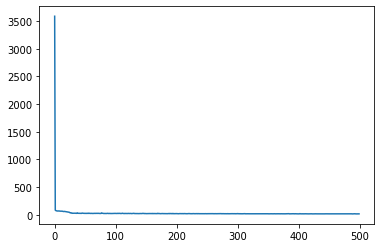

In [12]:
# x = print(history.history['loss'])
plt.plot(history.history['loss'])
plt.show()

In [13]:
#y_eval = model.predict(scaler.transform(x3))
score = model.evaluate(X_test, y_test)

1128/1128 [==============================] - 0s 23us/sample - loss: 22.1457 - mean_squared_error: 22.1457 - mean_absolute_error: 2.9980


In [14]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['scaler.save']

In [15]:
model.save('DNN_2layer_10_params.h5')

In [16]:
y_eval = model.predict(scaler.transform(x))
y_actual = df['wattsupPower'].values

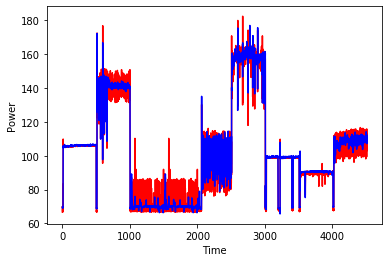

In [17]:
plt.plot(y_actual, color='red')
plt.plot(y_eval, color='blue')
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()
